<a href="https://colab.research.google.com/github/alvarofpinheiro/pifwia_sa/blob/main/PIFWIA_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No Simulated Annealing existe o conceito de temperatura que possibilita em alguns casos o algoritmo ir para um local com um fitness pior, isso é feito para incentivar exploração e evitar pontos de otimo local

```
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

Temperatura_maxima = parametro_1
Temperatura_minima = parametro_2
Temperatura_atual = Temperatura_maxima

while Temperatura_atual > Temperatura_minima:
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)
  if fitness(nova_solucao) < fitness(solucao_inicial):
    solucao_incial = nova_solucao

  elif exp((fitness(solucao_inicial) - fitness(nova_solucao))/Temperatura_atual) > random(0,1): 
  # caso seja um problema de maximização a ordem do fitness inverte
    solucao_incial = nova_solucao
  temperatura_atual = atualizar_temperatura()
```

Caixeiro Viajante

Um comerciente deseja viajar por varias cidades comprando e vendendo produtos. Ele quer seguir uma rota que tenha a menor distancia possivel, mas sem passar pela mesma cidade 2 vezes.  E apos passar por todas as cidades, ele precisa voltar a cidade em que ele iniciou seu percurso.

Ou seja: dado N pontos como podemos passar por todos 1 vez e voltar ao ponto zero?

Usando uma busca exaustiva a complexidade desse problema seria N! Ou seja se voce tivesse 100 cidades (9.332622e+157 possiveis rotas) e rodasse o algoritmo completo o universo iria acabar e o codigo nao teria terminado de rodar.

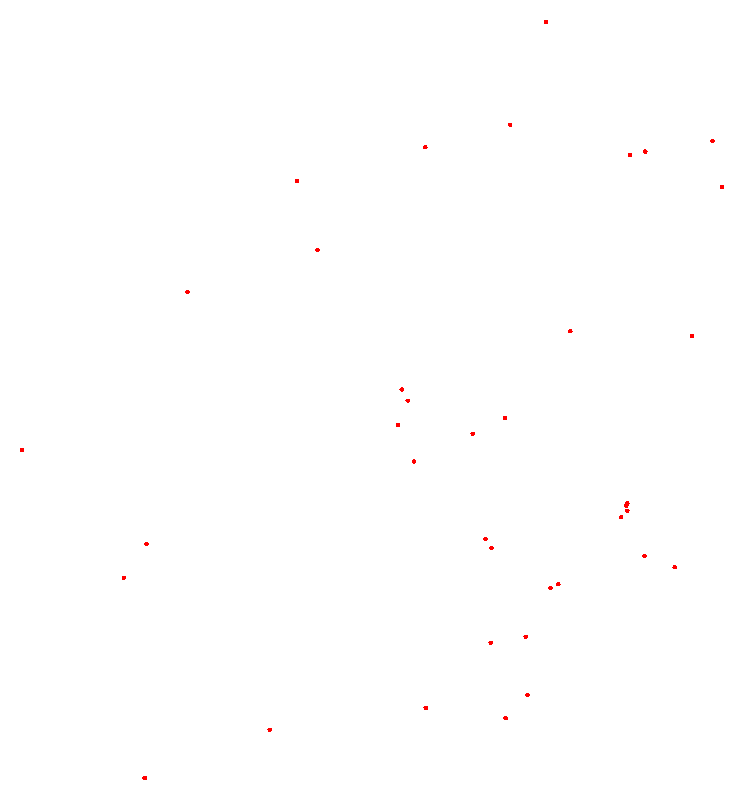

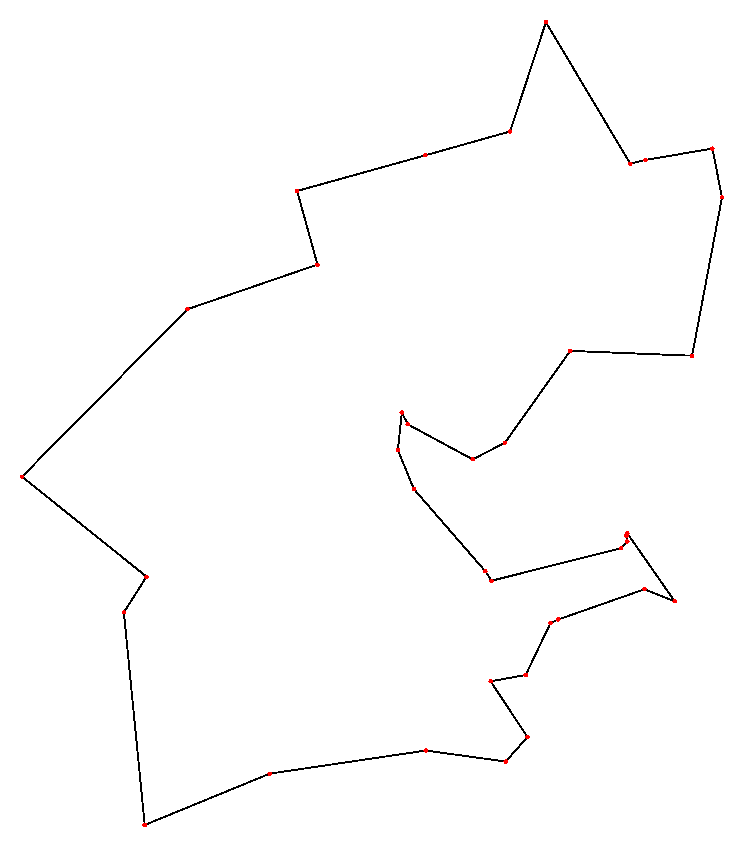

In [1]:
# Imports

import random
import math
import matplotlib.pyplot as plt

In [2]:
# Codigo para o problema do caixeiro viajante

NUMERO_DE_CIDADES = 38

POSICOES = [
[ 11003.611100, 42102.500000],
[ 11108.611100, 42373.888900],
[ 11133.333300, 42885.833300],
[ 11155.833300, 42712.500000],
[ 11183.333300, 42933.333300],
[ 11297.500000, 42853.333300],
[ 11310.277800, 42929.444400],
[ 11416.666700, 42983.333300],
[ 11423.888900, 43000.277800],
[ 11438.333300, 42057.222200],
[ 11461.111100, 43252.777800],
[ 11485.555600, 43187.222200],
[ 11503.055600, 42855.277800],
[ 11511.388900, 42106.388900],
[ 11522.222200, 42841.944400],
[ 11569.444400, 43136.666700],
[ 11583.333300, 43150.000000],
[ 11595.000000, 43148.055600],
[ 11600.000000, 43150.000000],
[ 11690.555600, 42686.666700],
[ 11715.833300, 41836.111100],
[ 11751.111100, 42814.444400],
[ 11770.277800, 42651.944400],
[ 11785.277800, 42884.444400],
[ 11822.777800, 42673.611100],
[ 11846.944400, 42660.555600],
[ 11963.055600, 43290.555600],
[ 11973.055600, 43026.111100],
[ 12058.333300, 42195.555600],
[ 12149.444400, 42477.500000],
[ 12286.944400, 43355.555600],
[ 12300.000000, 42433.333300],
[ 12355.833300, 43156.388900],
[ 12363.333300, 43189.166700],
[ 12372.777800, 42711.388900],
[ 12386.666700, 43334.722200],
[ 12421.666700, 42895.555600],
[ 12645.000000, 42973.333300]]
# Fonte: http://www.math.uwaterloo.ca/tsp/world/countries.html
# Melhor resultado possivel: 6656
# Numero de cidades: 38
# Numero de possiveis caminhos: 5.2302262e+44

class cidade:
  def __init__(self, x, y):
    self.posicao_x = x
    self.posicao_y = y
  def distancia(self, cidade_externa):
    return  math.sqrt((self.posicao_x - cidade_externa.posicao_x)**2 + 
                      (self.posicao_y - cidade_externa.posicao_y)**2)

def cidades_inicial_usando_referencia():
  lista = []
  for i in range(0, NUMERO_DE_CIDADES):
    lista.append(cidade(POSICOES[i][0], POSICOES[i][1]))
  return lista

def gerar_solucao_aleatoria():
  lista_de_cidades = list(range(0, NUMERO_DE_CIDADES))
  lista_aleatoria = []
  for i in range(0, NUMERO_DE_CIDADES):
    cidade = random.choice(lista_de_cidades)
    lista_aleatoria.append(cidade)
    lista_de_cidades.remove(cidade)
  return lista_aleatoria

def fitness(possivel_solucao):
  fitness = 0
  for i in range(0, NUMERO_DE_CIDADES): 
    if i < NUMERO_DE_CIDADES - 1:
      fitness += cidades[possivel_solucao[i]].distancia(cidades[possivel_solucao[i+1]])
    else:
      fitness += cidades[possivel_solucao[i]].distancia(cidades[possivel_solucao[0]])
  return fitness

def mudar_solucao(solucao):
  solucao_modificada = []
  for i in range(0, NUMERO_DE_CIDADES):
    solucao_modificada.append(solucao[i])
  index_1 = random.randint(0, NUMERO_DE_CIDADES - 1)
  index_2 = random.randint(0, NUMERO_DE_CIDADES - 1)
  while(index_1 == index_2):
    index_2 = random.randint(0, NUMERO_DE_CIDADES - 1)
  cidade_1 = solucao[index_1]
  cidade_2 = solucao[index_2]
  solucao_modificada[index_2] = cidade_1
  solucao_modificada[index_1] = cidade_2
  return solucao_modificada

In [3]:
# --- Codigo para visualização ---
# --- Codigo para demonstração visual utilizando matplotlib ---
# Caixeiro Viajante

def gerar_grafico(lista_cidades, solucao):
  x = []
  y = []
  for i in range(0, NUMERO_DE_CIDADES):
    x.append(lista_cidades[solucao[i]].posicao_x)
    y.append(lista_cidades[solucao[i]].posicao_y)
    plt.plot(lista_cidades[solucao[i]].posicao_x, 
             lista_cidades[solucao[i]].posicao_y, 'ro')

  x.append(lista_cidades[solucao[0]].posicao_x)
  y.append(lista_cidades[solucao[0]].posicao_y)
  plt.plot(x, y)
  plt.title('Solução aleatoria inicial')
  plt.show()

In [4]:
# --- Algoritimo: Simulated Annealing ---
# --- Problema: Caixeiro Viajante ---
# para calcular e^x, pois a biblioteca math estava dando erro

import numpy as np

# Parametros
TEMPERATURA_MAXIMA = 500.0
TEMPERATURA_MINIMA = 0.01

cidades = cidades_inicial_usando_referencia()

def executar_simulated_annealing():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria()

  # É calculado o fitness da solução incial
  fitness_atual = fitness(solucao_atual)

  # É definido um criterio de parada
  temperatura = TEMPERATURA_MAXIMA

  # print('Fitness Inicial: ', "%.3f" % fitness_atual)

  # --- Função para demonstração visual utilizando matplotlib ---
  # gerar_grafico(cidades, solucao_atual)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada 
  while temperatura > TEMPERATURA_MINIMA:

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao(solucao_atual)

    # A nova solução é comparada com a anterior
    if fitness(nova_solucao) < fitness(solucao_atual):

      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      fitness_atual = fitness(solucao_atual)
    
    # Mesmo que o novo local seja pior que o anterior existe uma chance que o 
    # algoritmo va a ele, isso é feito para aumentar a exploração e evitar 
    # otimos locais
    elif np.exp(((fitness(solucao_atual) - fitness(nova_solucao))/temperatura)) > random.random():
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_CIDADES):
        solucao_atual.append(nova_solucao[j])
      # o fitness é atualizado
      fitness_atual = fitness(solucao_atual)
  
    temperatura -= TEMPERATURA_MINIMA

  # --- Função para demonstração visual utilizando matplotlib ---
  # gerar_grafico(cidades, solucao_atual)

  return fitness_atual

In [6]:
# Testes dos algoritimos:
# --- Simulated Annealing ---

NUMERO_DE_EXECUCOES = 8
best = 100000000
media = 0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_simulated_annealing()
  media += aux
  if aux < best:
    best = aux

print('---------- Caixeiro viajante ------- Simulated Annealing ----------')
print('Melhore resultado de todas as execuções: ', "%.3f" % best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')

---------- Caixeiro viajante ------- Simulated Annealing ----------
Melhore resultado de todas as execuções:  7356.185
Resultado medio:  7818.048
-------------------------------------------------------------------


